# Dataset Visualization and Statistics

In [50]:
import tgx
from tgx.utils.plotting_utils import plot_for_snapshots

<div class="alert alert-block alert-info">
    <b>Tip:</b> For all suported TGB datasets, see <a href="https://github.com/ComplexData-MILA/TGX/blob/master/tgx/data/tgb.py"><b>tgx/data/tgb.py</b></a> and <a href="https://complexdata-mila.github.io/TGX/tutorials/data_loader/"><b>data loading tutorial</b></a>
</div>

In [55]:
import pandas as pd
#first parse csv 
df = pd.read_csv('/home/buchta/sambashare/gnn_darpa_lab/DyGLib/DG_data/cadets/cadets_small.csv')


In [56]:
import datetime
import datetime
import pandas as pd
new_df = df[['timestamp', 'source_node', 'destination_node']]
new_df = new_df.rename(columns={'timestamp': 'time', 'source_node': 'source', 'destination_node': 'destination'})
new_df['time'] = new_df['time'] // 10**9


new_df.to_csv('/home/buchta/sambashare/gnn_darpa_lab/DyGLib/DG_data/cadets/cadets_edgelist_viz.csv', index=False)

new_df

,time,source,destination
0,1522706861,0,0
1,1522706861,0,1
2,1522706861,0,2
3,1522706861,0,3
4,1522706861,1,4
...,...,...,...
499994,1522724496,43499,45999
499995,1522724496,43499,43499
499996,1522724496,43499,44758
499997,1522724496,43499,43499


In [57]:
from tgx.io.read import read_csv
# header indicates if there is a header row at the top
# index whether the first column is row indices
# t_col indicates which column corresponds to timestamps
cadets_fname = '/home/buchta/sambashare/gnn_darpa_lab/DyGLib/DG_data/cadets/cadets_edgelist_viz.csv'
edgelist = read_csv(cadets_fname, 
         header=True,
         index=False,
         t_col=0,)
ctdg = tgx.Graph(edgelist=edgelist)

Number of loaded edges: 499998
Number of unique edges: 88029
Available timestamps:  17627


In [58]:
# ctdg = tgx.Graph(dataset) # retrieve the continuous time dynamic graph
time_scale = "minutely" #"minutely", "hourly", "daily", "monthly", "yearly", "biyearly"
dtdg, ts_list = ctdg.discretize(time_scale=time_scale, store_unix=True)

Discretizing data to 294 timestamps...


In [59]:
ts_list

[1522706861,
 1522706861,
 1522706861,
 1522706861,
 1522706861,
 1522706861,
 1522706861,
 1522706861,
 1522706861,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,
 1522706921,

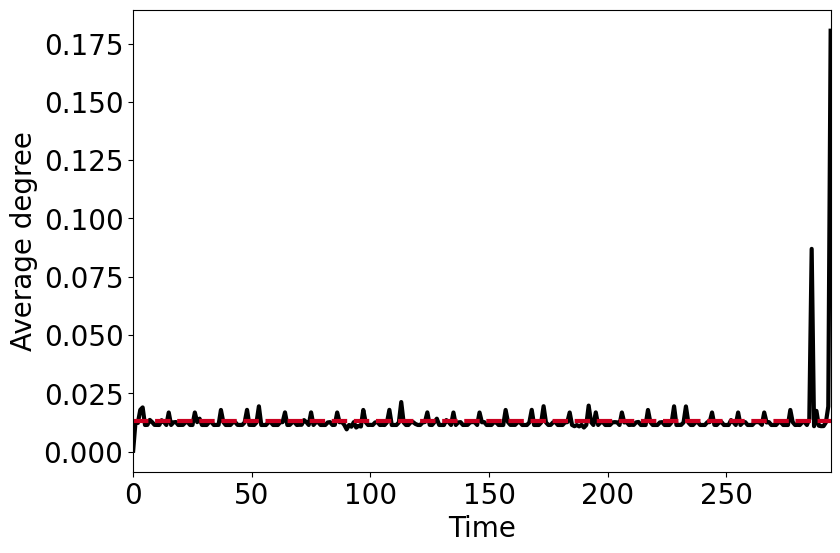

In [60]:
dname = "cadets"
tgx.degree_over_time(dtdg, network_name=dname)

### Load Built-in Dataset

Load the built-in datasets in TGX that come from 
[Towards Better Evaluation for Dynamic Link Prediction (NeurIPS 2022 Datasets and Benchmarks Track)](https://openreview.net/forum?id=1GVpwr2Tfdg).

<div class="alert alert-block alert-info">
    <b>Tip:</b> For all built-in datasets, see <a href="https://github.com/ComplexData-MILA/TGX/blob/master/tgx/data/builtin.py"><b>tgx/data/builtin.py</b></a> and <a href="https://complexdata-mila.github.io/TGX/tutorials/data_loader/"><b>data loading tutorial</b></a>
</div>

### Graph Discretization for Visualization

We can discretize a temporal graph into snapshots (i.e., equally spaced durations) for visualization purposes.

In [61]:
# ctdg = tgx.Graph(dataset) # retrieve the continuous time dynamic graph
time_scale = "minutely" #"minutely", "hourly", "daily", "monthly", "yearly", "biyearly"
dtdg, ts_list = ctdg.discretize(time_scale=time_scale, store_unix=True)

Discretizing data to 294 timestamps...


<div class="alert alert-block alert-info">
<b>Tip:</b> The discretization function returns the discretized TG as its first argument (<b>dtdg</b>) and the remapped unix timestamps as its second argument (<b>ts_list</b>). The <b>dtdg</b> has integer timestamps (snapshot ids) thus <b>ts_list</b> keep tracks of the unix timestamps of all edges in the coarsened time granularity.  
</div>

## TGX Features 

TGX provides a suite of visualization tools for better analyzing the dynamics of temporal graphs.

Below is a list of visualization approaches offered by TGX.

<div class="alert alert-block alert-danger">
<b>Important:</b> A discretized graph should be provided as input.
</div>

| Function | Description |
| --- | --- |
| [`tgx.degree_over_time`](#Average-Node-Degree-Over-Time) | Plot the average node degree over time|
| [`tgx.nodes_over_time`](#Number-of-Nodes-Over-Time) | Plot the number of active nodes per snapshot |
| [`tgx.edges_over_time`](#Number-of-Edges-Over-Time) | Plot the number of edges per snapshot |
| [`tgx.nodes_and_edges_over_time`](#Number-of-Nodes-and-Edges-Over-Time) | Plot the number of active nodes and edges in the same figure|
| [`tgx.connected_components_per_ts`](#Number-of-Connected-Components) |Plot the number of connected components per timestamp.|
| [`tgx.degree_density`](#Degree-Density) | Plot the density map of node degrees per time window |
| [`tgx.TEA`](#Temporal-Edge-Appearance-(TEA)-Plot) | Plot Temporal Edge Appearance (TEA) (from [Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg))|
| [`tgx.TET`](#Temporal-Edge-Traffic-(TET)-Plot) | Plot Temporal Edge Traffic (TET) from ([Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg))|


For each visualization tool, you can specify the output path with `filepath`, otherwise the output is saved in the current directory. 

<div class="alert alert-block alert-warning">
<b>Example:</b> <code> tgx.degree_over_time(dtdg, network_name=dataset.name, filepath=filepath) </code>
</div> 

In what follows, we cover some of the visualizations offered by TGX.

### Average Node Degree Over Time
The goal is to plot the average node degree of snapshot. 

In this plot, the *x-axis* is the snapshot index (or timestamps), while the *y-axis* is the average node degree.

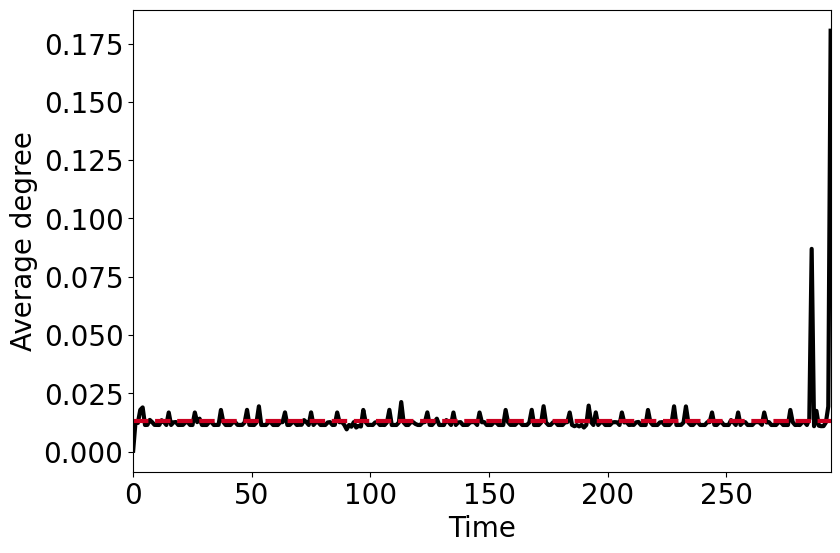

In [62]:
dname = "cadets"
tgx.degree_over_time(dtdg, network_name=dname)

### Number of Nodes Over Time
The goal is to plot the number of active nodes per snapshot. 

In this plot, *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the number of active nodes.

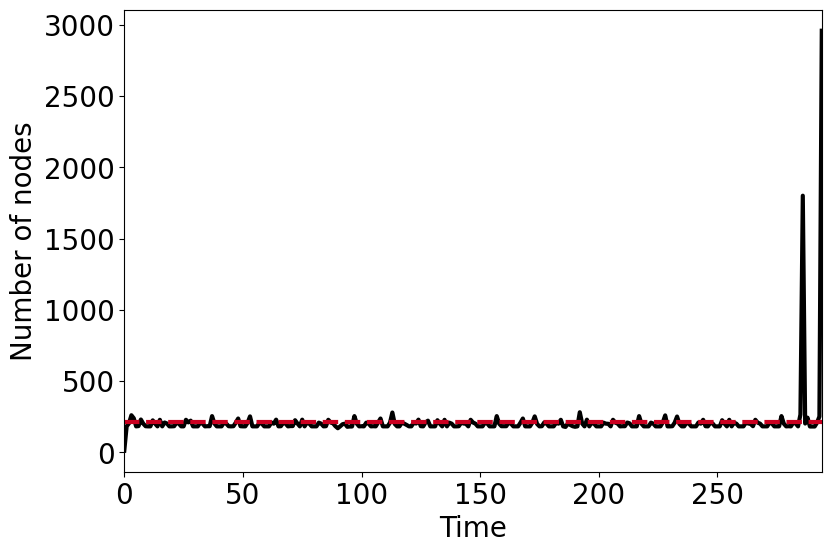

In [63]:
tgx.nodes_over_time(dtdg, network_name=dname)

### Number of Edges Over Time
The goal is to plot the number of edges per snapshot. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the number of edges.

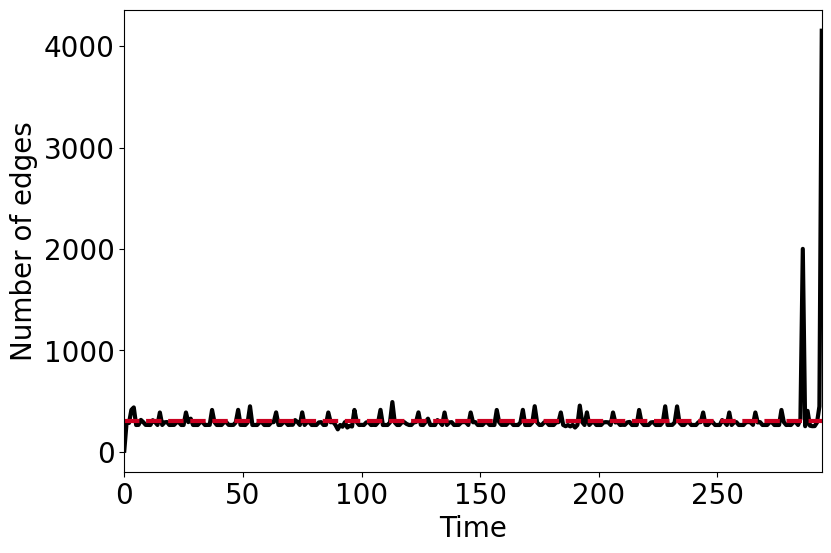

In [64]:
tgx.edges_over_time(dtdg, network_name=dname)

### Number of Nodes and Edges Over Time
The goal is to plot the number of active nodes and edges per snapshot in the same figure. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the active number of nodes / edges.

Plotting number of nodes and edges per timestamp.


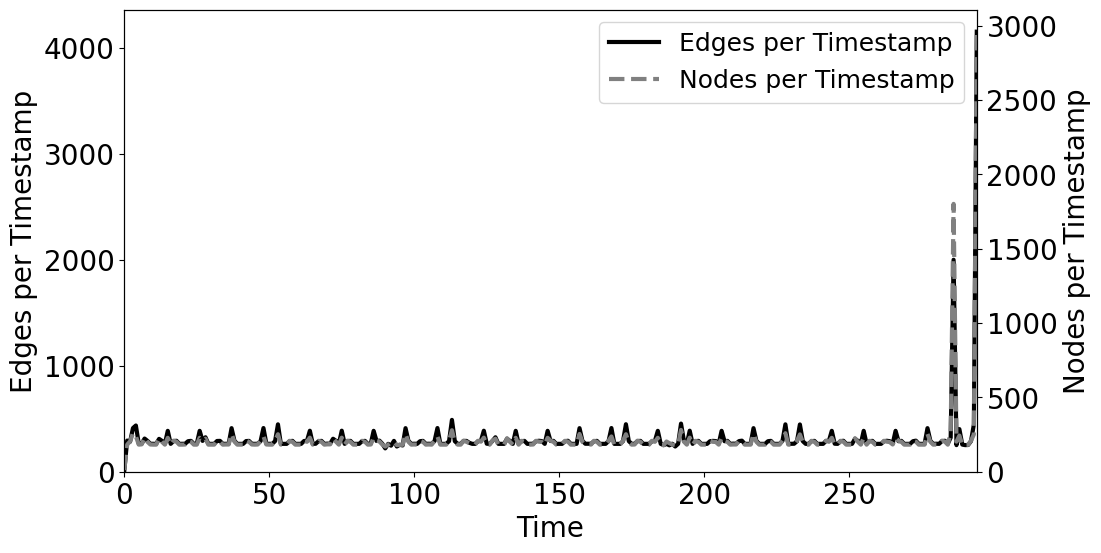

In [65]:
tgx.nodes_and_edges_over_time(dtdg, network_name=dname)

### Number of Connected Components

The goal is to plot number of connected components per snapshot. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the number of connected components.

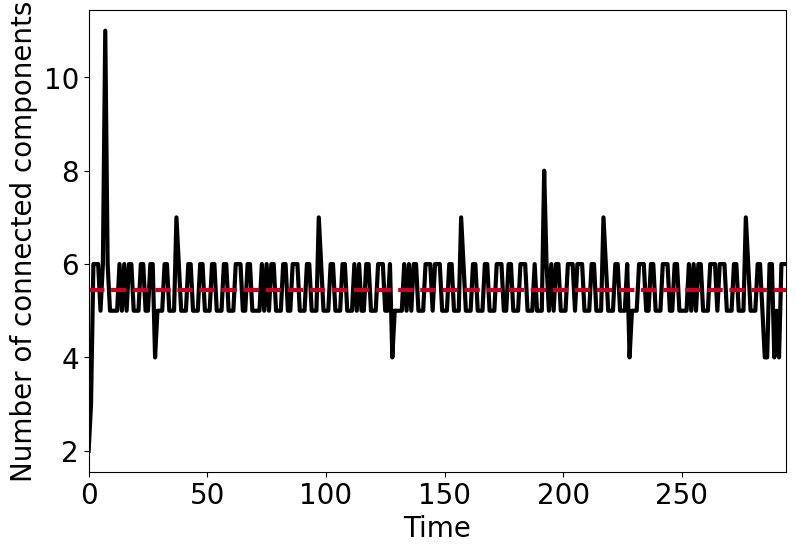

In [66]:
tgx.connected_components_per_ts(dtdg, network_name=dname)

### Degree Density

The goal is to plot the heatmap of node degrees per snapshot. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the node degree.

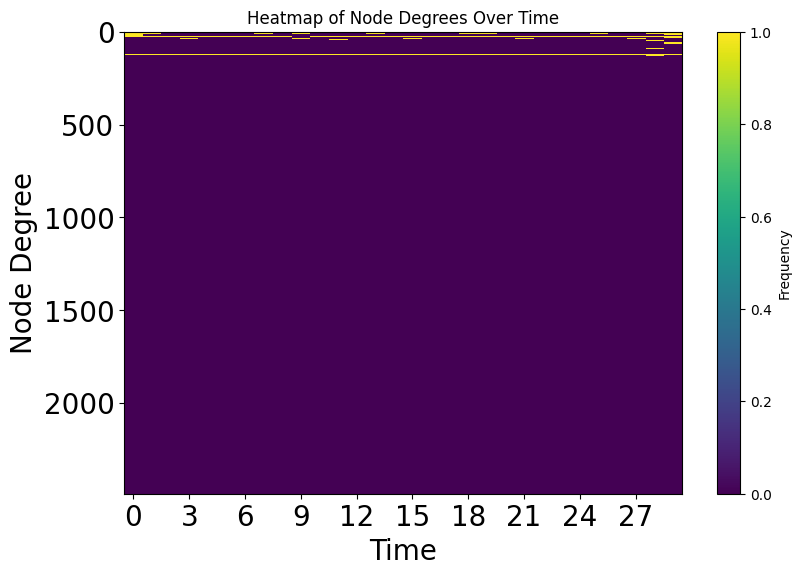

In [67]:
tgx.degree_density(dtdg, k=10, network_name=dname)

### Temporal Edge Appearance (TEA) Plot
A TEA plot illustrates the portion of repeated edges versus newly observed edges for each timestamp in a dynamic graph. 

This plot is proposed in [Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg).

plot saved as ./cadets_TEA.pdf


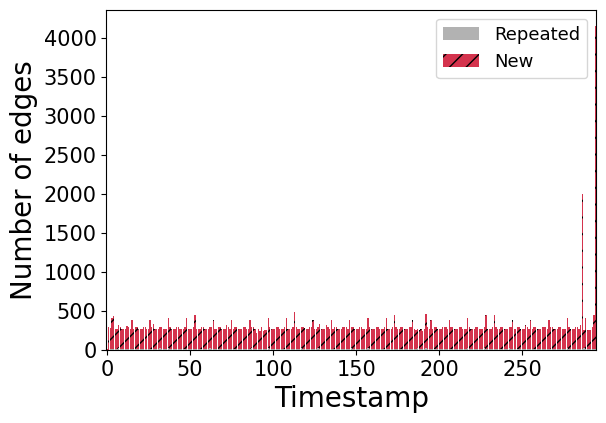

In [68]:
tgx.TEA(dtdg, 
        network_name=dname)

### Temporal Edge Traffic (TET) Plot

A TET plot visualizes the reocurrence pattern of edges in different dynamic networks over time

This plot is proposed in [Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg).

Info: Number of distinct edges (from index-edge map): 88029


295it [00:00, 5926.94it/s]


Info: edge-presence-matrix shape: (295, 88029)
First level processing: 
Detecting edges present in train & test sets


100%|██████████| 250/250 [00:59<00:00,  4.19it/s]


Detecting transductive edges (seen in train, repeating in test)


100%|██████████| 45/45 [00:20<00:00,  2.23it/s]


Second level processing:
Detecting edges 1) Only in train set, 2) only in test (inductive)


100%|██████████| 295/295 [00:54<00:00,  5.42it/s]


Info: edge-presence-matrix shape: (295, 88029)
Info: plotting edge presence heatmap for . ...


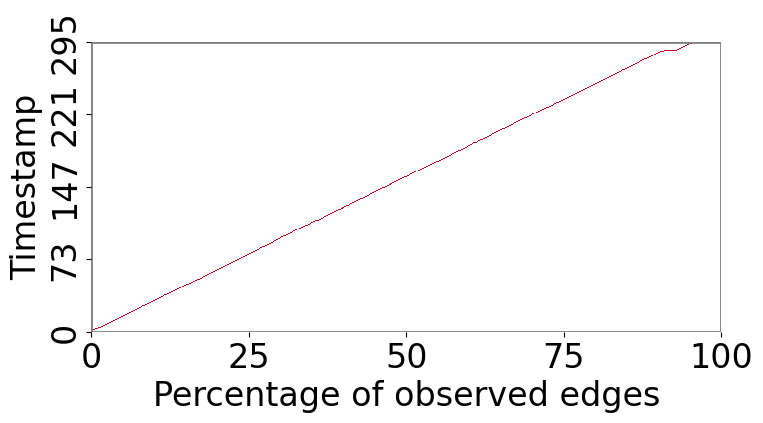

Info: plotting done!


In [48]:
# kernel crahsed :/ after 40min 
tgx.TET(dtdg, 
        network_name=dname, 
        figsize = (9, 5),
        axis_title_font_size = 24,
        ticks_font_size = 24)

## Temporal Graph Statistics


TGX provides APIs to compute the statistics of temporal graphs. 

Here, we cover some the functionalities for obtaining temporal graph statistics provided by TGX. 

| Function | Description | Returns |
| --- | --- | --- |
| ```tgx.get_reoccurrence``` | Calculate the recurrence index | ```float``` |
| ```tgx.get_surprise``` | Calculate the surprise index | ```float``` |
| ```tgx.get_novelty``` | Calculate the novelty index | ```float``` |
| ```tgx.get_avg_node_activity``` | Calculate the average node activity | ```float``` |
| [```tgx.size_connected_components```](#Size-of-Connected-Components) | Calculate the sizes of connected components | ```List[List[float]]```|
| ```tgx.get_avg_node_engagement``` | Calculate the average node engagement | ```List[float]``` |


Since some the measures require distinct test split, we should first set the `test_ratio`. 
Please note that temporal graph data is generally split in a chronological manner. 

You can use `plot_for_snapshots` for visualizing the statistics reports. 

In [69]:
test_ratio = 0.15

# compute reocurrence
tgx.get_reoccurrence(ctdg, test_ratio=test_ratio)

# compute surprise
tgx.get_surprise(ctdg, test_ratio=test_ratio)

# compute novelty
tgx.get_novelty(dtdg)

# compute node activity
tgx.get_avg_node_activity(dtdg)

INFO: Reoccurrence: 0.00029988861280095966
INFO: Surprise: 0.9988348868175766
INFO: Novelty: 0.9708029893807996
INFO: Node activity ratio: 0.00460223173789791


0.00460223173789791

### Size of Connected Components

You can also visualize some statistics such as how the size of the largest component changes over time.

In [ ]:
component_sizes = tgx.size_connected_components(dtdg)
largest_component_sizes = [max(inner_list) if inner_list else 0 for inner_list in component_sizes]
filename = f"{dname}_largest_connected_component_size"
plot_for_snapshots(largest_component_sizes, y_title="Size of Largest Connected Component", filename="./"+filename)

### Average Node Engagement

The goal is to calculate the average node engagement over time. 
*Node engagement* represents the average number of distinct nodes that establish at least one new connection during a timestamp.

In [ ]:
engagements = tgx.get_avg_node_engagement(dtdg)
filename = f"{dname}_average_node_engagement"
plot_for_snapshots(engagements, y_title="Average Engagement", filename="./"+filename)